In [124]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import neighbors, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


## After library importing lets load the dataset

In [6]:
mushroom_data = pd.read_csv("C:/Users/sravy/OneDrive/Documents/MSISOM/Sample Practice  Proj/mushrooms.csv")
mushroom_data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## My end goal here is to perform Classification of MUSHROOMS using datasets. So, Iets get the insights of the the data by examining(DATA ANALYSIS). 

In [43]:
#After importing the data, to learn more about the dataset, we'll use .head() .info() and .describe() and all the other required  methods.
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [10]:
mushroom_data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

##There are no null values, which is beneficial.If there are any, remove them or replace them with 0 or NAN.

## Plotting visualization for better understanding data.So let's plot bar graph for every column

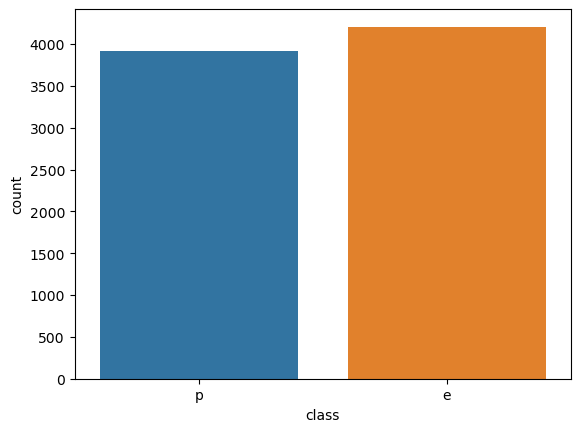

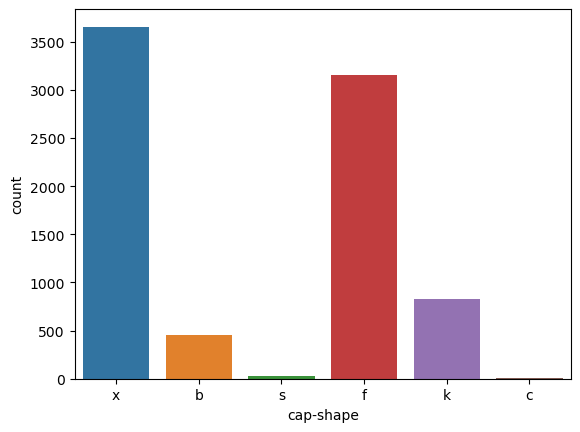

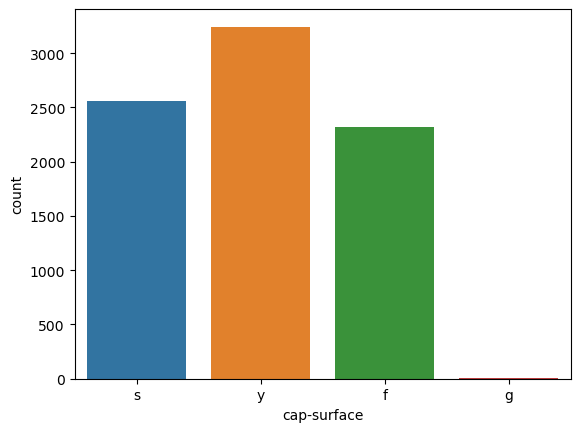

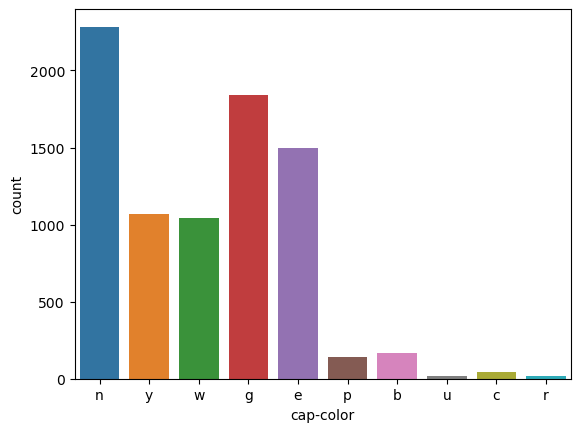

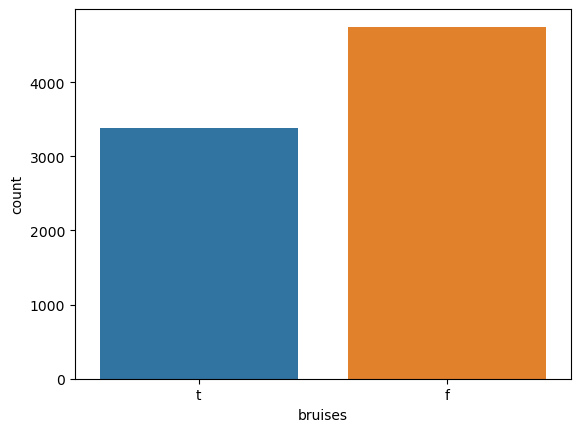

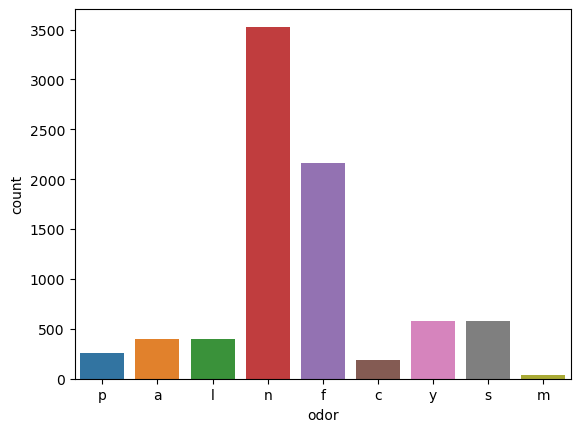

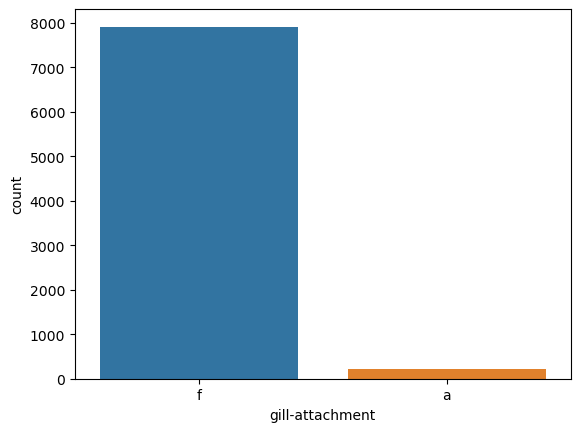

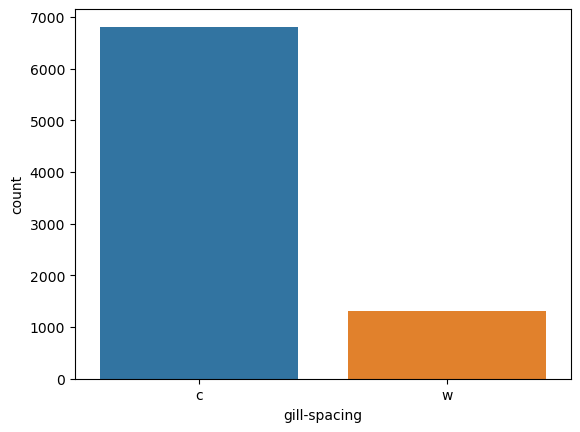

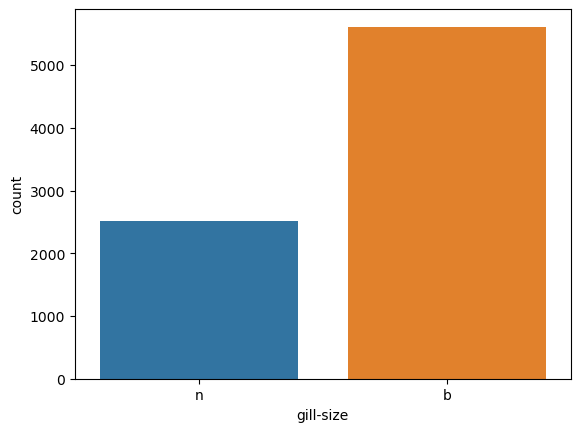

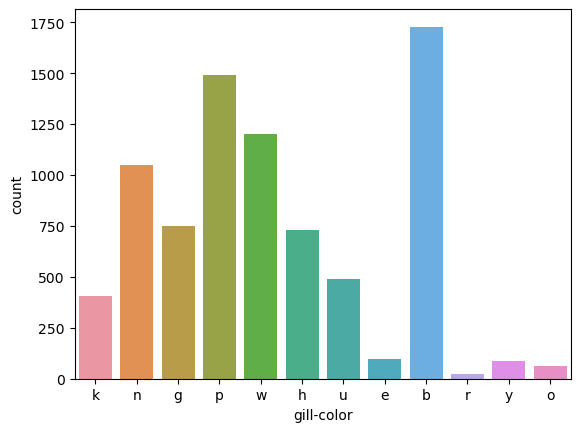

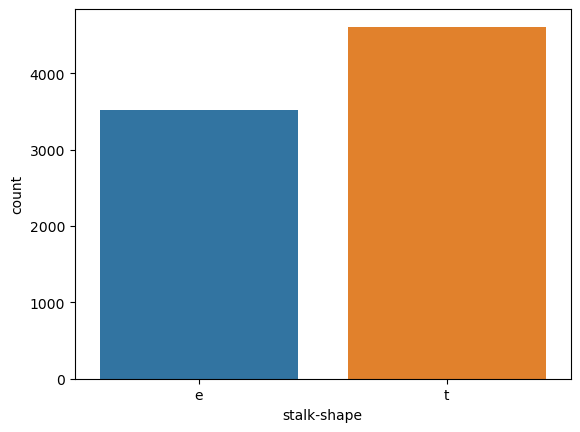

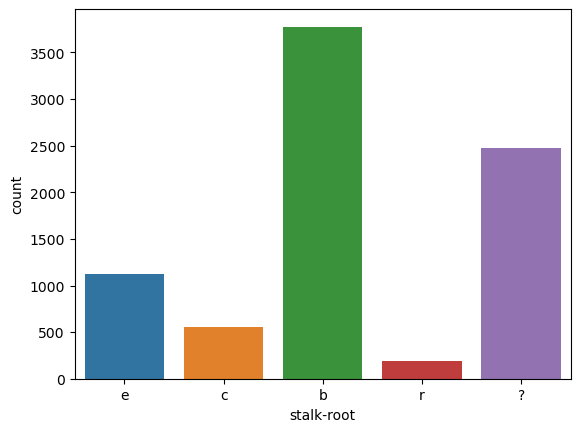

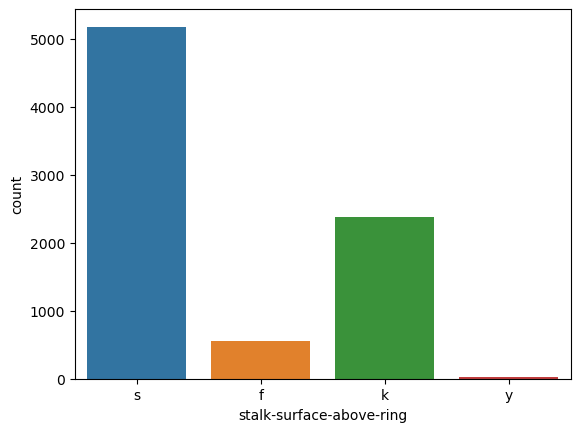

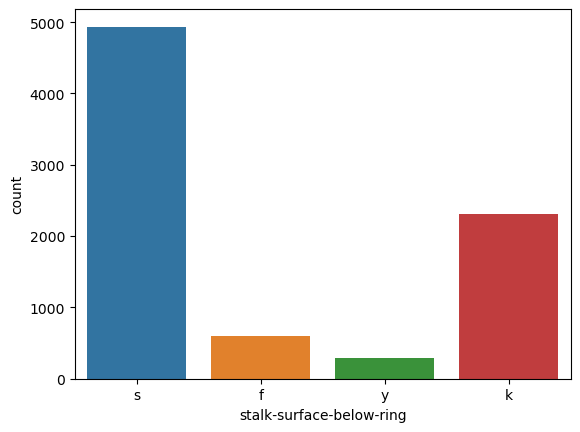

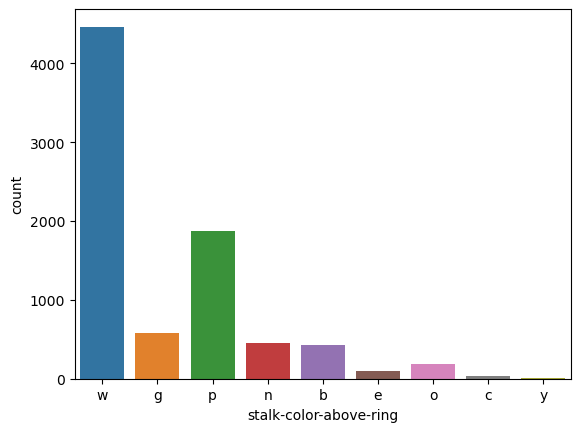

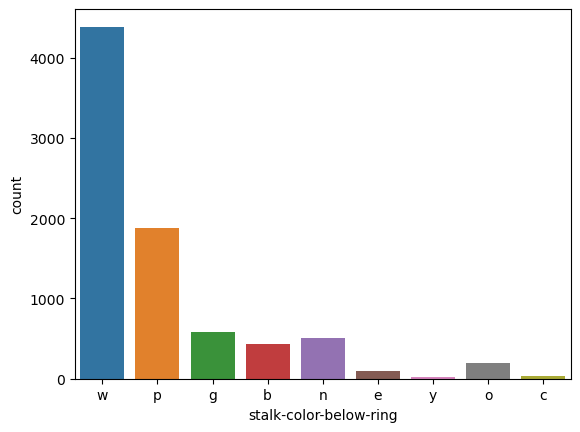

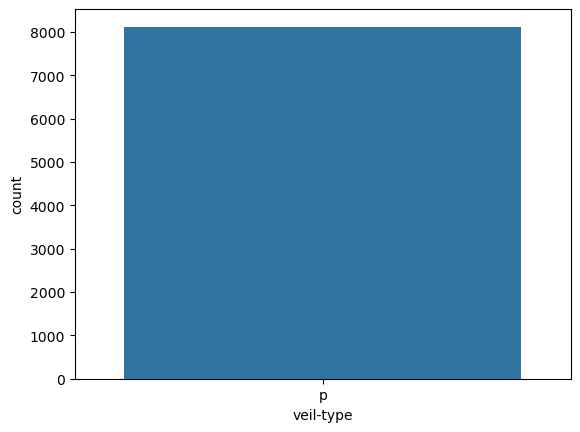

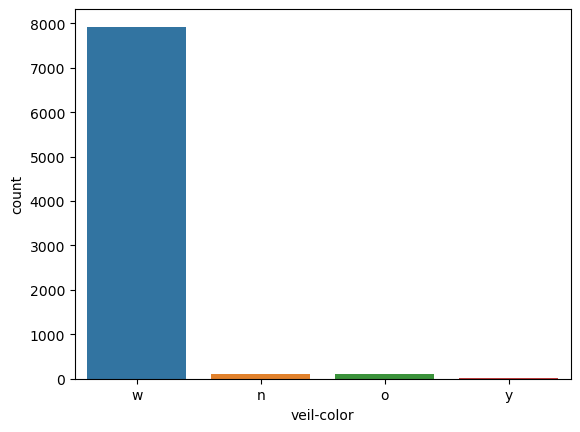

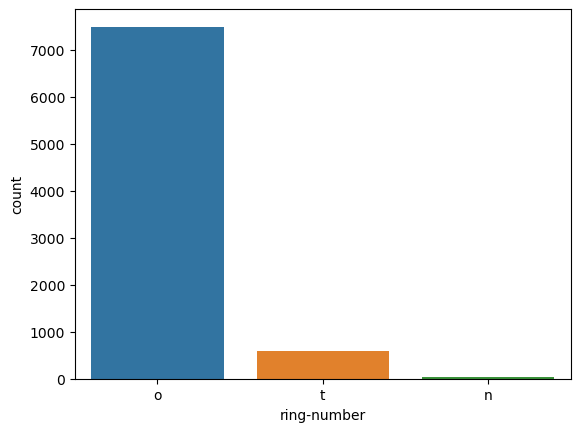

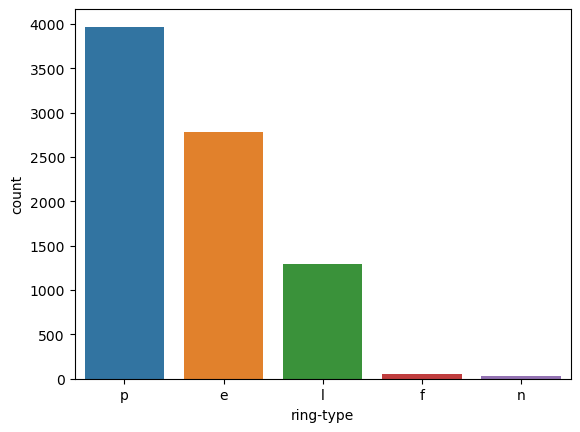

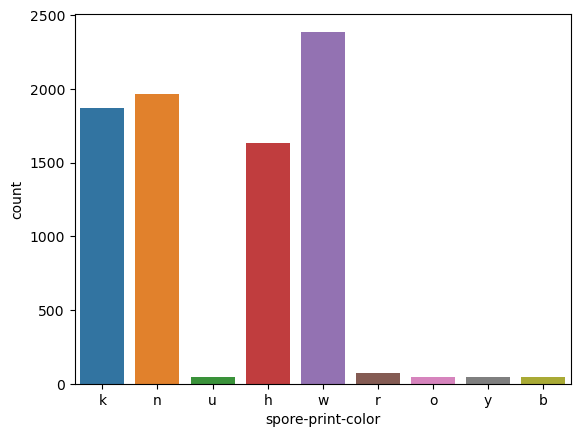

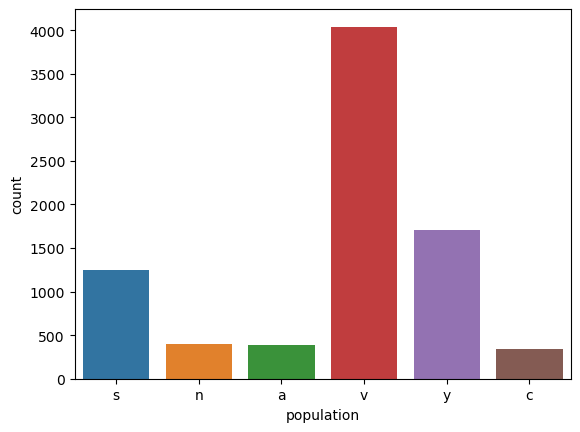

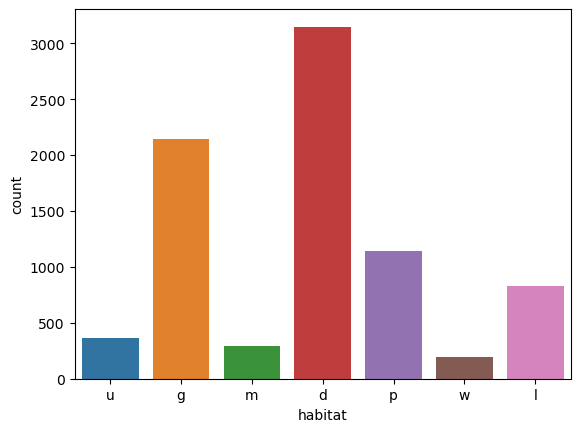

In [16]:
for i in mushroom_data.columns:
    sns.countplot(x = i, data = mushroom_data)
    plt.show()

## Visualizing the count of edible and poisonous mushrooms


In [47]:
mushroom_data['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [48]:
mushroom_data["class"].unique()

array([1, 0], dtype=int64)

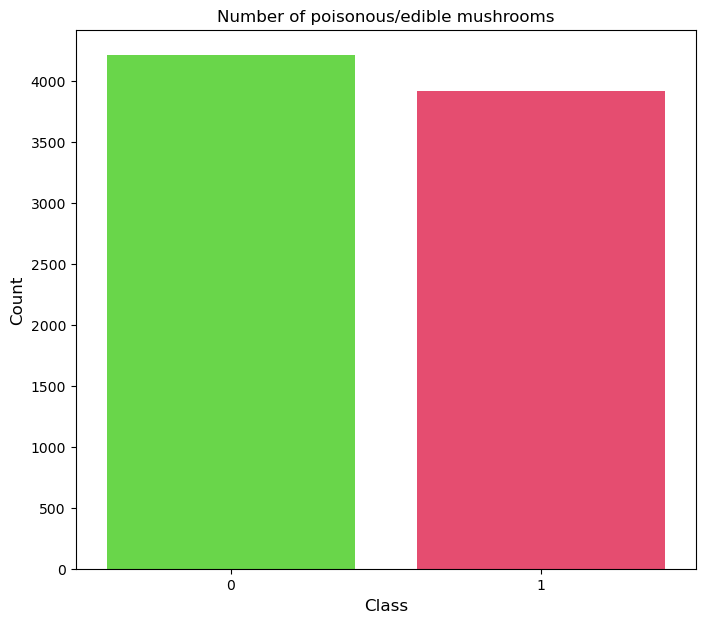

In [87]:
mushroom_class = mushroom_data["class"]
mushroom_class = mushroom_data['class'].value_counts()
mushroom_count = mushroom_class
plt.figure(figsize=(8,7))
mushroom_count = pd.DataFrame({'Class':mushroom_count.index, 'Count': mushroom_count.values})
ax = sns.barplot(data = count, x = "Class",y = "Count" ,alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
plt.show()

In the above plot 0 = edible and 1 = poison.The dataset is balanced.

## Encoding

In [96]:

encoder = LabelEncoder()
for column in mushroom_data.columns:
    mushroom_data[column] = encoder.fit_transform(mushroom_data[column])




In [89]:
## AS we can see from the above table the column "veil-type" is 0 and not contributing to the data so we remove it.
mushroom_data = mushroom_data.drop(["veil_type"], axis =1)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


## Let's look at the correlation between the variables

In [97]:
corr_mushrrom = mushroom_data.corr()
corr_mushrrom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


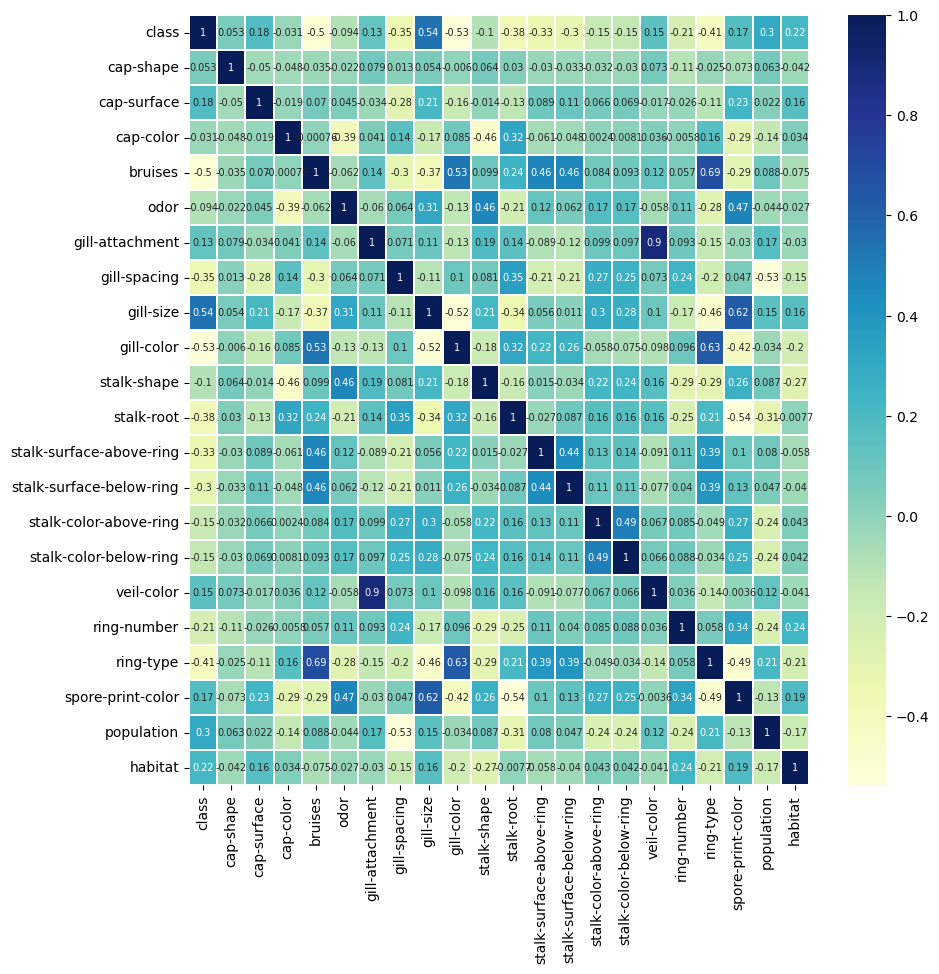

In [103]:
# Lets plot a heatmap.
plt.figure(figsize = (10, 10))
sns.heatmap(corr_mushrrom,linewidths=.1,annot=True, annot_kws={"size": 7}, cmap="YlGnBu")
plt.show()

## Usually, the least correlating variable is the most important one for classification. In this case, "gill-color" has -0.53 so let's look at it closely.

In [104]:
mushroom_data[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561



## Preparing the data.

In [113]:
#Setting X and y axis and splitting the data into train and test respectively.

X = mushroom_data.drop("class",axis = 1)
y = mushroom_data["class"] 
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size= 0.3, random_state = 40)


## Building the Classification Models.

In [122]:
#KNN model
best_Kvalue = 0
best_score = 0

for i in range(1,10):
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(X_train, y_train)
     if knn.score(X_test, y_test) > best_score:
        best_score = knn.score(X_train, y_train)
        best_Kvalue = i
#y_pred = fit.predict(X_test)
print("Best KNN Value: {}".format(best_Kvalue))
#print("Test Accuracy: {}%".format(round(best_score*100,2)))

print("Predictions: {}".format(y_pred))
print("KNN Accuracy: ", round(metrics.accuracy_score(y_test, predict)*100,2), "%")

Best KNN Value: 1
Predictions: [0 1 1 ... 0 1 0]
KNN Accuracy:  99.88 %


## Classification report of KNN Classifier

In [125]:
y_pred_knn = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1248
           1       1.00      1.00      1.00      1190

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



## Confusion Matrix of KNN Classifier

In [127]:
#simple way to do confusion matrix
print(confusion_matrix(y_test, y_pred))

[[1248    0]
 [   3 1187]]
